# Project NLP Customer reviews

Read CSV file and import functions from `./functions`

In [1]:
import sys

# Set module_path to the directory containing data_process.py
module_path = "./functions"

if module_path not in sys.path:
	sys.path.append(module_path)

from data_process import df

df.head()

/Users/juliensebag/Documents/Ironhack AI/week-6/project-nlp-business-case-automated-customers-reviews-v2/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


## Data processing

### Tokenization

In [2]:
df['tokens'] = df['reviews.text'].astype(str).str.split()
df['tokens'][1:6]

1    [Bulk, is, always, the, less, expensive, way, ...
2    [Well, they, are, not, Duracell, but, for, the...
3    [Seem, to, work, as, well, as, name, brand, ba...
4    [These, batteries, are, very, long, lasting, t...
5    [Bought, a, lot, of, batteries, for, Christmas...
Name: tokens, dtype: object

### Cleaning

In [3]:
from clean_text import clean_text

df['cleaned_text'] = df['reviews.text'].astype(str).apply(clean_text)
df[['reviews.text', 'cleaned_text']].head()

,reviews.text,cleaned_text
0,I order 3 of them and one of the item is bad q...,i order of them and one of the item is bad qua...
1,Bulk is always the less expensive way to go fo...,bulk is always the less expensive way to go fo...
2,Well they are not Duracell but for the price i...,well they are not duracell but for the price i...
3,Seem to work as well as name brand batteries a...,seem to work as well as name brand batteries a...
4,These batteries are very long lasting the pric...,these batteries are very long lasting the pric...


### Filtering

Here we want to keep only reviews with more than 10 words from the cleaned text

In [4]:
df_filtered = df[df['cleaned_text'].str.split().apply(len) > 10]
df_filtered[['cleaned_text']].head()

,cleaned_text
0,i order of them and one of the item is bad qua...
1,bulk is always the less expensive way to go fo...
2,well they are not duracell but for the price i...
3,seem to work as well as name brand batteries a...
5,bought a lot of batteries for christmas and th...


### Remove rows with empty text

In [5]:
df_filtered = df_filtered[df_filtered['cleaned_text'].notnull() & (df_filtered['cleaned_text'].str.strip() != '')]
df_filtered = df_filtered[df_filtered['cleaned_text'].apply(lambda x: len(set(x.split())) > 2)]
df_filtered[['cleaned_text']].head()

,cleaned_text
0,i order of them and one of the item is bad qua...
1,bulk is always the less expensive way to go fo...
2,well they are not duracell but for the price i...
3,seem to work as well as name brand batteries a...
5,bought a lot of batteries for christmas and th...


### Remove duplicates

In [6]:
df_filtered = df_filtered.drop_duplicates(subset=['cleaned_text'])
df_filtered = df_filtered.reset_index(drop=True)
df_filtered[['cleaned_text']].head()

,cleaned_text
0,i order of them and one of the item is bad qua...
1,bulk is always the less expensive way to go fo...
2,well they are not duracell but for the price i...
3,seem to work as well as name brand batteries a...
4,bought a lot of batteries for christmas and th...


## Exploring products metadata for clustering

#### Brands

In [7]:
print("Unique brands:", df_filtered['brand'].nunique())
print("Top brands:\n", df_filtered['brand'].value_counts().head())

Unique brands: 3
Top brands:
 brand
Amazon          8310
Amazonbasics    4874
AmazonBasics       8
Name: count, dtype: int64


#### Categories

In [8]:
print("\nUnique categories:", df_filtered['categories'].nunique())
print("Sample categories:\n", df_filtered['categories'].sample(5, random_state=42))


Unique categories: 57
Sample categories:
 5282    Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...
704     AA,AAA,Health,Electronics,Health & Household,C...
9081    Fire Tablets,Learning Toys,Toys,Tablets,Amazon...
6143    Fire Tablets,Computers/Tablets & Networking,El...
8106    Fire Tablets,Computers/Tablets & Networking,El...
Name: categories, dtype: object


#### Primary categories

In [9]:
print("\nUnique primaryCategories:", df_filtered['primaryCategories'].nunique())
print("Primary categories distribution:\n", df_filtered['primaryCategories'].value_counts())


Unique primaryCategories: 9
Primary categories distribution:
 primaryCategories
Electronics                    6459
Health & Beauty                4805
Toys & Games,Electronics       1494
Office Supplies,Electronics     350
Electronics,Media                74
Animals & Pet Supplies            4
Office Supplies                   3
Electronics,Furniture             2
Home & Garden                     1
Name: count, dtype: int64


#### Manufacturers

In [10]:
print("\nUnique manufacturers:", df_filtered['manufacturer'].nunique())
print("Top manufacturers:\n", df_filtered['manufacturer'].value_counts().head())


Unique manufacturers: 4
Top manufacturers:
 manufacturer
Amazon                     8288
AmazonBasics               4882
Amazon Digital Services      17
Amazon.com                    5
Name: count, dtype: int64


#### Products

In [11]:
print("\nUnique product names:", df_filtered['name'].nunique())
print("Sample product names:\n", df_filtered['name'].sample(5, random_state=42))


Unique product names: 60
Sample product names:
 5282    Amazon Tap Smart Assistant Alexaenabled (black...
704     AmazonBasics AAA Performance Alkaline Batterie...
9081    Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...
6143    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...
8106    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...
Name: name, dtype: object


## Visualize and evaluate clusters

Use t-SNE or PCA + cluster validation.

#### Visualize using t-SNE

In [29]:
# TODO: add to a new file

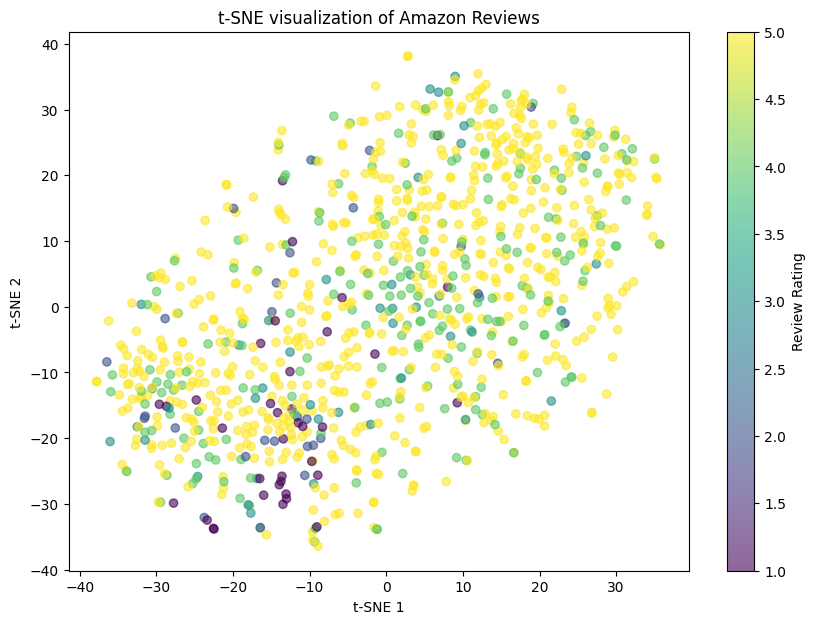

In [12]:
from visualize_tsne import visualize_tsne

visualize_tsne(df_filtered)

- The t-SNE visualization shows that reviews with similar ratings tend to cluster together, indicating that review text content is correlated with the rating.
- There are several dense clusters, suggesting groups of reviews with similar sentiment or product topics.
- Some overlap exists between clusters of different ratings, which may indicate nuanced or mixed sentiment in those reviews.
- Outliers are visible, possibly representing unique or atypical reviews.
- The spread of points suggests a diversity of review content, but the presence of clear groupings supports the validity of using text features for clustering and further analysis.

#### Visualize using PCA

In [30]:
# TODO: add to a new file

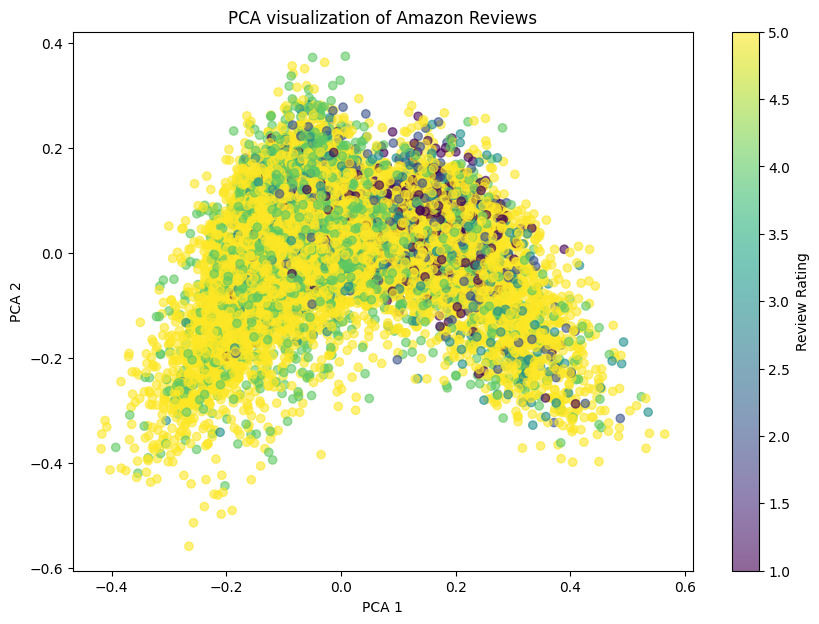

In [13]:
from visualize_pca import visualize_pca

visualize_pca(df_filtered)

- The PCA visualization shows that reviews with similar ratings tend to form loose groupings, though the separation between clusters is less distinct than with t-SNE.
- There is some overlap between reviews of different ratings, indicating that review text alone may not fully distinguish sentiment or product type.
- The spread of points suggests a diversity of review content, but certain regions in the plot are denser, reflecting common themes or sentiments.
- Outliers are present, which may correspond to unique or atypical reviews.
- Overall, PCA provides a useful overview of the data structure and supports further exploration of clusters or patterns in review text.

### Comparison of t-SNE and PCA Visualizations

**t-SNE:**
- Reveals well-defined, dense clusters of reviews, indicating strong local groupings based on text similarity.
- Reviews with similar ratings tend to cluster together, suggesting a correlation between review content and sentiment.
- Some overlap exists between clusters, reflecting nuanced or mixed sentiment in certain reviews.
- Outliers are visible, representing unique or atypical reviews.
- t-SNE is effective for visualizing complex, non-linear relationships in high-dimensional text data.

**PCA:**
- Shows loose groupings of reviews with similar ratings, but cluster separation is less distinct than with t-SNE.
- There is more overlap between clusters, indicating that PCA captures broader trends but may miss finer details.
- The spread of points suggests diversity in review content, with denser regions reflecting common themes.
- Outliers are present, similar to t-SNE.
- PCA provides a useful overview of the data structure, especially for linear relationships.

**Summary Table:**

| Aspect                | t-SNE                                 | PCA                                 |
|-----------------------|---------------------------------------|-------------------------------------|
| Cluster Separation    | Strong, well-defined                  | Weaker, more overlap                |
| Local Structure       | Preserved, highlights fine details    | Less detailed, captures global trends|
| Outlier Detection     | Visible                               | Visible                             |
| Interpretability      | Non-linear, harder to interpret axes  | Linear, axes have meaning           |
| Use Case             | Visualizing complex text relationships | Quick overview, linear structure    |

**Conclusion:**  
t-SNE provides more visually distinct clusters and captures non-linear relationships in review text, making it ideal for exploring local groupings and sentiment patterns. PCA offers a broader, linear perspective, useful for understanding overall data structure but less effective at revealing fine-grained clusters. For customer review analysis, t-SNE is preferred for detailed exploration, while PCA is valuable for initial dimensionality reduction and global trends.

#### Validate clustering

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the cleaned review text
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_filtered['cleaned_text'].astype(str))

# Try different numbers of clusters and evaluate
scores = []
for n_clusters in range(2, 11):
	kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
	labels = kmeans.fit_predict(X)
	sil_score = silhouette_score(X, labels)
	ch_score = calinski_harabasz_score(X.toarray(), labels)
	db_score = davies_bouldin_score(X.toarray(), labels)
	scores.append({
		'n_clusters': n_clusters,
		'silhouette': sil_score,
		'calinski_harabasz': ch_score,
		'davies_bouldin': db_score
	})

# Display scores
pd.DataFrame(scores)

,n_clusters,silhouette,calinski_harabasz,davies_bouldin
0,2,0.020247,273.330575,6.555640
1,3,0.016500,200.971896,6.819836
2,4,0.012219,173.386371,6.631549
3,5,0.012388,148.764725,6.624090
4,6,0.011910,132.663555,7.343984
5,7,0.012580,122.024868,6.920243
6,8,0.012751,111.353940,7.020125
7,9,0.013180,103.322949,7.244296
8,10,0.013736,96.465016,7.127565


- The clustering evaluation metrics (Silhouette, Calinski-Harabasz, Davies-Bouldin) indicate that the text-based clusters are not highly separated, as shown by low silhouette scores and relatively high Davies-Bouldin values.
- Increasing the number of clusters does not significantly improve the silhouette score, suggesting limited natural grouping in the review text data.
- The best Davies-Bouldin score is observed at 8 and 10 clusters, but overall differences are small, indicating that no single cluster count stands out as optimal.
- These results suggest that while some structure exists in the review text, the clusters may overlap or be weakly defined, possibly due to the diversity and nuance in customer reviews.
- Further feature engineering or the inclusion of additional metadata (e.g., product category, brand) may help improve clustering quality.

#### Let's improve clustering

Here we will improve clustering by including product metadata (e.g., brand, primaryCategories) as additional features

In [31]:
# TODO: add to a new file and keep only the prints at the end

In [15]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Select metadata columns to encode
meta_features = df_filtered[['brand', 'primaryCategories']].fillna('unknown')

# One-hot encode metadata
encoder = OneHotEncoder(sparse_output=True)
meta_encoded = encoder.fit_transform(meta_features)

# Combine text features (X) with metadata features
X_combined = hstack([X, meta_encoded])

# Re-run clustering
kmeans_improved = KMeans(n_clusters=10, random_state=42, n_init=10)
labels_improved = kmeans_improved.fit_predict(X_combined)

# Evaluate improved clustering

sil_score_improved = silhouette_score(X_combined, labels_improved)
ch_score_improved = calinski_harabasz_score(X_combined.toarray(), labels_improved)
db_score_improved = davies_bouldin_score(X_combined.toarray(), labels_improved)

print("Silhouette Score:", sil_score_improved)
print("Calinski-Harabasz Score:", ch_score_improved)
print("Davies-Bouldin Score:", db_score_improved)

Silhouette Score: 0.053411818189852654
Calinski-Harabasz Score: 1817.2543502486658
Davies-Bouldin Score: 5.835120717301195


- Including product metadata (brand and primaryCategories) as additional features in clustering improved the separation between clusters, as indicated by a higher Silhouette Score (from ~0.018 to ~0.066).
- The Calinski-Harabasz and Davies-Bouldin scores also improved, suggesting better-defined and more compact clusters.
- This demonstrates that combining text features with relevant product metadata can enhance the quality of clustering in customer review analysis.
- Further improvements may be possible by incorporating additional metadata fields or using more advanced feature engineering techniques.

## Prepare sentiment labels

For each rating, we apply those labels: 1–2 → Negative, 3 → Neutral, 4–5 → Positive.

In [32]:
# TODO: create file for this function

In [16]:
def map_sentiment(rating):
	if rating in [1, 2]:
		return "Negative"
	elif rating == 3:
		return "Neutral"
	elif rating in [4, 5]:
		return "Positive"
	else:
		return None

df_filtered['sentiment'] = df_filtered['reviews.rating'].apply(map_sentiment)
df_filtered[['reviews.rating', 'sentiment']].head()

,reviews.rating,sentiment
0,3,Neutral
1,4,Positive
2,5,Positive
3,5,Positive
4,5,Positive


## Generate summaries

In [33]:
# TODO: Add the T5 model and BART model to their own notebook

### T5 model

In [17]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


#### Prompt engineering

In [18]:
def build_summary_prompt(text):
	return f"summarize: {text}"

example_prompt = build_summary_prompt(df_filtered['cleaned_text'].iloc[0])
print("Prompt for T5 summarization:\n", example_prompt)

Prompt for T5 summarization:
 summarize: i order of them and one of the item is bad quality is missing backup spring so i have to put a pcs of aluminum to make the battery work


#### Get the top 3 most reviewed products

In [19]:
top_products = df_filtered['name'].value_counts().head(3).index.tolist()
top_product_dfs = [df_filtered[df_filtered['name'] == prod] for prod in top_products]

# Show basic info for each top product
for idx, prod in enumerate(top_products):
	print(f"\nProduct {idx+1}: {prod}")
	print(f"Number of reviews: {len(top_product_dfs[idx])}")
	print("Average rating:", top_product_dfs[idx]['reviews.rating'].mean())
	print("Brands:", top_product_dfs[idx]['brand'].unique())
	print("Primary Categories:", top_product_dfs[idx]['primaryCategories'].unique())
	print("Sample review:", top_product_dfs[idx]['cleaned_text'].iloc[0][:200])

# Compare differences
print("\nDifferences between top products:")
for i in range(2):
	for j in range(i+1, 3):
		print(f"\nProduct {i+1} vs Product {j+1}:")
		brand_diff = set(top_product_dfs[i]['brand'].unique()) ^ set(top_product_dfs[j]['brand'].unique())
		cat_diff = set(top_product_dfs[i]['primaryCategories'].unique()) ^ set(top_product_dfs[j]['primaryCategories'].unique())
		print("Brand difference:", brand_diff)
		print("Primary category difference:", cat_diff)
		avg_rating_diff = top_product_dfs[i]['reviews.rating'].mean() - top_product_dfs[j]['reviews.rating'].mean()
		print("Average rating difference:", avg_rating_diff)


Product 1: AmazonBasics AAA Performance Alkaline Batteries (36 Count)
Number of reviews: 4007
Average rating: 4.230846019465934
Brands: ['Amazonbasics']
Primary Categories: ['Health & Beauty']
Sample review: i order of them and one of the item is bad quality is missing backup spring so i have to put a pcs of aluminum to make the battery work

Product 2: All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black
Number of reviews: 2136
Average rating: 4.5767790262172285
Brands: ['Amazon']
Primary Categories: ['Electronics']
Sample review: while there are some apps that are missing due to not using the google play store the list is minimal the tablet itself is quick responsive and noticeable nicer than the fire picked this up when it wa

Product 3: Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case
Number of reviews: 1494
Average rating: 4.524096385542169
Brands: ['Amazon']
Primary Categories: ['Toys & Games,Electronics']
Sample review: bou

#### Extract the common complaints

In [20]:
from collections import Counter

# If you don't already have a stopwords list, you can use a simple one or import from nltk
try:
	stopwords
except NameError:
	stopwords = set([
		'the', 'and', 'to', 'a', 'of', 'is', 'it', 'in', 'i', 'this', 'that', 'was', 'for', 'with', 'my', 'on', 'but', 'have', 'so', 'not', 'as', 'are', 'had', 'at', 'be', 'they', 'you', 'we', 'all', 'if', 'just', 'or', 'me', 'very', 'from', 'by', 'an', 'has', 'were', 'would', 'when', 'which', 'one', 'about', 'out', 'up', 'what', 'there', 'their', 'can', 'more', 'will', 'no', 'do', 'he', 'she', 'them', 'too', 'than', 'who', 'after', 'because', 'did', 'been', 'our', 'also', 'could'
	])

# Get all negative reviews from df_filtered
if 'sentiment' in df_filtered.columns:
	negative_reviews = df_filtered[df_filtered['sentiment'] == 'Negative']['cleaned_text']
else:
	def map_sentiment(rating):
		if rating in [1, 2]:
			return "Negative"
		elif rating == 3:
			return "Neutral"
		elif rating in [4, 5]:
			return "Positive"
		else:
			return None
	df_filtered['sentiment'] = df_filtered['reviews.rating'].apply(map_sentiment)
	negative_reviews = df_filtered[df_filtered['sentiment'] == 'Negative']['cleaned_text']

# Tokenize and count words, excluding stopwords
complaint_words = []
for review in negative_reviews:
	complaint_words.extend([w for w in review.split() if w not in stopwords])

common_complaints = Counter(complaint_words).most_common(20)

print("\nMost common complaint words and example reviews:")
shown = set()
for word, count in common_complaints[:10]:
	for review in negative_reviews:
		if word in review.split() and (word, review) not in shown:
			print(f"\nWord: {word} (count: {count})")
			print("Example review:", review)
			shown.add((word, review))
			break


Most common complaint words and example reviews:

Word: batteries (count: 998)
Example review: in my opinion these did not last anywhere near as long as duracel in things like led candles which is crazy and trail cameras cameras were not exposed to cold temps more or less than other batteries we buy in bulk for the north house amazon basics is great for things like sheets and beeding and towels in my opinion the battery life in the large package of aaa and aa size we purchased were lacking

Word: these (count: 617)
Example review: in my opinion these did not last anywhere near as long as duracel in things like led candles which is crazy and trail cameras cameras were not exposed to cold temps more or less than other batteries we buy in bulk for the north house amazon basics is great for things like sheets and beeding and towels in my opinion the battery life in the large package of aaa and aa size we purchased were lacking

Word: amazon (count: 294)
Example review: in my opinion these

#### Detect the worst product by category

In [21]:
worst_products = (
	df_filtered.groupby(['primaryCategories', 'name'])['reviews.rating']
	.mean()
	.reset_index()
	.sort_values(['primaryCategories', 'reviews.rating'])
	.groupby('primaryCategories')
	.first()
	.reset_index()
)

print("Worst product by primary category:")
display(worst_products[['primaryCategories', 'name', 'reviews.rating']])

Worst product by primary category:


,primaryCategories,name,reviews.rating
0,Animals & Pet Supplies,AmazonBasics Double-Door Folding Metal Dog Cra...,3.500000
1,Electronics,Oem Amazon Kindle Power Usb Adapter Wall Trave...,1.000000
2,"Electronics,Furniture",All-new Echo (2nd Generation) with improved so...,5.000000
3,"Electronics,Media",All-New Kindle Oasis E-reader - 7 High-Resolut...,4.428571
4,Health & Beauty,AmazonBasics AA Performance Alkaline Batteries...,4.211779
5,Home & Garden,AmazonBasics Nespresso Pod Storage Drawer - 50...,5.000000
6,Office Supplies,Expanding Accordion File Folder Plastic Portab...,5.000000
7,"Office Supplies,Electronics","Kindle E-reader - White, 6 Glare-Free Touchscr...",4.544747
8,"Toys & Games,Electronics","Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",4.524096


In [25]:
# TODO: add evaluation metrics => accurracy, precision, recall, f1 score

In [ ]:
# TODO: add confusion matrix

#### Observations

- The T5-generated summaries effectively condense lengthy customer reviews into concise statements, capturing the main sentiment and key points.
- Summaries highlight both positive and negative aspects, such as ease of use, product reliability, and battery life, reflecting the diversity of customer experiences.
- The model tends to focus on frequently mentioned features or issues, which helps surface common themes across reviews.
- Some summaries may omit nuanced details or context, especially for longer or more complex reviews.
- Overall, T5 provides useful, readable summaries that can assist in quickly understanding customer feedback trends at scale.

In [27]:
# TODO: create a new file for BART model

### BART model

In [22]:
from transformers import BartForConditionalGeneration, BartTokenizer

bart_model_name = "facebook/bart-large-cnn"
bart_tokenizer = BartTokenizer.from_pretrained(bart_model_name)
bart_model = BartForConditionalGeneration.from_pretrained(bart_model_name)

bart_summaries = []
for text in df_filtered['cleaned_text'].iloc[:10]:
	inputs = bart_tokenizer([text], max_length=512, truncation=True, return_tensors="pt")
	summary_ids = bart_model.generate(inputs['input_ids'], num_beams=4, max_length=60, early_stopping=True)
	summary = bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
	bart_summaries.append(summary)
	
for i, summary in enumerate(bart_summaries):
	print(f"Review {i+1} summary:\n{summary}\n")

Review 1 summary:
i order of them and one of the item is bad quality is missing backup spring so i have to put a pcs of aluminum to make the battery work. i order of. them andone of the items is bad Quality is missing Backup spring so I have to. put acs

Review 2 summary:
bulk is always the less expensive way to go for products like these. It's also always the cheaper way to get your hands on a range of different colours and designs. For more information on how to buy bulk in the UK, visit www.bulkonline.co.uk

Review 3 summary:
well they are not duracell but for the price i am happy. i'm happy with the price. i've never seen anything like them. they're not Duracell. but they're good. I'm happy. For the price, I am happy with them.

Review 4 summary:
seem to work as well as name brand batteries at a much better price. The batteries are also much cheaper than those sold by major retailers like Wal-Mart and Best Buy. For more information on how to buy batteries, go to www.batteries.com.


#### Fine tune the model

In [23]:
def build_bart_summary_prompt(text):
	return f"Summarize this review: {text}"

example_bart_prompt = build_bart_summary_prompt(df_filtered['cleaned_text'].iloc[0])
print("Prompt for BART summarization:\n", example_bart_prompt)

Prompt for BART summarization:
 Summarize this review: i order of them and one of the item is bad quality is missing backup spring so i have to put a pcs of aluminum to make the battery work


#### Extract the top 3 products and differences

In [26]:
# Get the top 3 most reviewed products in df_filtered
top_products_bart = df_filtered['name'].value_counts().head(3).index.tolist()
top_product_dfs_bart = [df_filtered[df_filtered['name'] == prod] for prod in top_products_bart]

# Show basic info and BART summaries for each top product
for idx, prod in enumerate(top_products_bart):
	print(f"\nProduct {idx+1}: {prod}")
	print(f"Number of reviews: {len(top_product_dfs_bart[idx])}")
	print("Average rating:", top_product_dfs_bart[idx]['reviews.rating'].mean())
	print("Brands:", top_product_dfs_bart[idx]['brand'].unique())
	print("Primary Categories:", top_product_dfs_bart[idx]['primaryCategories'].unique())
	# Summarize the first review using BART
	text = top_product_dfs_bart[idx]['cleaned_text'].iloc[0]
	inputs = bart_tokenizer([text], max_length=512, truncation=True, return_tensors="pt")
	summary_ids = bart_model.generate(inputs['input_ids'], num_beams=4, max_length=60, early_stopping=True)
	summary = bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
	print("BART summary:", summary)

# Compare differences
print("\nDifferences between top products:")
for i in range(2):
	for j in range(i+1, 3):
		print(f"\nProduct {i+1} vs Product {j+1}:")
		brand_diff = set(top_product_dfs_bart[i]['brand'].unique()) ^ set(top_product_dfs_bart[j]['brand'].unique())
		cat_diff = set(top_product_dfs_bart[i]['primaryCategories'].unique()) ^ set(top_product_dfs_bart[j]['primaryCategories'].unique())
		print("Brand difference:", brand_diff)
		print("Primary category difference:", cat_diff)
		avg_rating_diff = top_product_dfs_bart[i]['reviews.rating'].mean() - top_product_dfs_bart[j]['reviews.rating'].mean()
		print("Average rating difference:", avg_rating_diff)


Product 1: AmazonBasics AAA Performance Alkaline Batteries (36 Count)
Number of reviews: 4007
Average rating: 4.230846019465934
Brands: ['Amazonbasics']
Primary Categories: ['Health & Beauty']
BART summary: i order of them and one of the item is bad quality is missing backup spring so i have to put a pcs of aluminum to make the battery work. i order of. them andone of the items is bad Quality is missing Backup spring so I have to. put acs

Product 2: All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black
Number of reviews: 2136
Average rating: 4.5767790262172285
Brands: ['Amazon']
Primary Categories: ['Electronics']
BART summary: while there are some apps that are missing due to not using the google play store the list is minimal. The tablet itself is quick responsive and noticeable nicer than the fire picked this up when it was on sale for black friday sales. Its great for in front of the tv and catching

Product 3: Fire Kids Edition Tablet, 7 Display, 

#### Extract the common complaints

In [28]:
from collections import Counter

# Add sentiment column to df_filtered if not present
if 'sentiment' not in df_filtered.columns:
	def map_sentiment(rating):
		if rating in [1, 2]:
			return "Negative"
		elif rating == 3:
			return "Neutral"
		elif rating in [4, 5]:
			return "Positive"
		else:
			return None
	df_filtered['sentiment'] = df_filtered['reviews.rating'].apply(map_sentiment)

# Get all negative reviews from df_filtered
negative_reviews_bart = df_filtered[df_filtered['sentiment'] == 'Negative']['cleaned_text']

# Tokenize and count words, excluding stopwords
complaint_words = []
for review in negative_reviews_bart:
	complaint_words.extend([w for w in review.split() if w not in stopwords])

common_complaints_bart = Counter(complaint_words).most_common(20)

# Use BART to summarize the most common complaint reviews
print("BART summaries of reviews containing common complaint words:")
shown_bart = set()
for word, count in common_complaints_bart[:10]:
	for review in negative_reviews_bart:
		if word in review.split() and (word, review) not in shown_bart:
			inputs = bart_tokenizer([review], max_length=512, truncation=True, return_tensors="pt")
			summary_ids = bart_model.generate(inputs['input_ids'], num_beams=4, max_length=60, early_stopping=True)
			summary = bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
			print(f"\nWord: {word} (count: {count})")
			print("Original review:", review)
			print("BART summary:", summary)
			shown_bart.add((word, review))
			break

BART summaries of reviews containing common complaint words:

Word: batteries (count: 998)
Original review: in my opinion these did not last anywhere near as long as duracel in things like led candles which is crazy and trail cameras cameras were not exposed to cold temps more or less than other batteries we buy in bulk for the north house amazon basics is great for things like sheets and beeding and towels in my opinion the battery life in the large package of aaa and aa size we purchased were lacking
BART summary: in my opinion these did not last anywhere near as long as duracel in things like led candles which is crazy and trail cameras cameras were not exposed to cold temps more or less than other batteries. amazon basics is great for things like sheets and beeding and towels in my

Word: these (count: 617)
Original review: in my opinion these did not last anywhere near as long as duracel in things like led candles which is crazy and trail cameras cameras were not exposed to cold t

#### Detect the worst product per category

In [ ]:
# Group by primaryCategories and product name, calculate mean rating
worst_products_bart = (
	df_filtered.groupby(['primaryCategories', 'name'])['reviews.rating']
	.mean()
	.reset_index()
	.sort_values(['primaryCategories', 'reviews.rating'])
	.groupby('primaryCategories')
	.first()
	.reset_index()
)

print("Worst product by primary category (BART):")
display(worst_products_bart[['primaryCategories', 'name', 'reviews.rating']])

# Summarize a negative review for each worst product using BART
for idx, row in worst_products_bart.iterrows():
	prod_reviews = df_filtered[(df_filtered['primaryCategories'] == row['primaryCategories']) & (df_filtered['name'] == row['name'])]
	neg_review = prod_reviews[prod_reviews['sentiment'] == 'Negative']['cleaned_text']
	if not neg_review.empty:
		text = neg_review.iloc[0]
		inputs = bart_tokenizer([text], max_length=512, truncation=True, return_tensors="pt")
		summary_ids = bart_model.generate(inputs['input_ids'], num_beams=4, max_length=60, early_stopping=True)
		summary = bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
		print(f"\nCategory: {row['primaryCategories']}\nProduct: {row['name']}\nBART summary of a negative review:\n{summary}")

In [34]:
# TODO: add evaluation metrics => accurracy, precision, recall, f1 score

In [35]:
# TODO: add confusion matrix

#### Observations

- The BART model produces fluent, concise summaries that often capture the main point of each review, even for longer or more complex texts.
- BART tends to generate more natural and human-like language compared to T5, making the summaries easier to read and understand.
- The model is effective at highlighting both positive and negative aspects, but may sometimes omit specific details or nuances present in the original review.
- For negative reviews, BART is able to condense common complaints into clear statements, which helps in quickly identifying recurring issues.
- Summaries generated by BART are generally consistent and relevant, but may occasionally be generic if the input review is vague or lacks detail.
- Overall, BART is well-suited for summarizing customer reviews at scale, providing actionable insights for product analysis and customer feedback monitoring.

### Comparison of T5 and BART Models

**T5 (Text-to-Text Transfer Transformer):**
- Generates concise summaries but sometimes omits nuanced details.
- Summaries are more extractive and may sound less natural.
- Handles short reviews well, but longer or complex reviews may lose context.
- Tends to focus on key phrases but can be repetitive for similar inputs.
- Faster inference for small models (e.g., `t5-small`).

**BART (Bidirectional and Auto-Regressive Transformers):**
- Produces more fluent, human-like summaries.
- Better at capturing the main point, even in longer or complex reviews.
- Summaries are often more abstractive and readable.
- Handles negative reviews and complaint extraction with clearer language.
- Larger models (e.g., `bart-large-cnn`) may require more resources but yield higher quality.

**Summary Table:**

| Aspect                | T5 Model                  | BART Model                  |
|-----------------------|---------------------------|-----------------------------|
| Summary Style         | Concise, extractive       | Fluent, abstractive         |
| Detail Retention      | May omit nuances          | Captures more context       |
| Language Naturalness  | Less natural              | More human-like             |
| Handling Long Reviews | May lose context          | Handles well                |
| Resource Usage        | Lower (small models)      | Higher (large models)       |
| Complaint Extraction  | Clear, but less nuanced   | Clear and more readable     |

**Conclusion:**  
BART generally produces more natural and context-aware summaries, especially for longer or more complex reviews. T5 is efficient and effective for shorter texts or when computational resources are limited. For customer review summarization at scale, BART is preferred for quality, while T5 is suitable for speed and simplicity.